**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [36]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [3]:
class_2=pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [37]:
#Displaying the overall dataset
class_2

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [38]:
#Displaying the first 10 rows of the dataset
class_2.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [39]:
##Displaying the last 10 rows of the dataset 
class_2.tail(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
## Finding the total no of rows and columns in the dataset
class_2.shape

(310, 7)

In [7]:
###Gathering info of the dataset to find there are any missing values in the dataset
class_2.info()
## Since all columns are found to have 310 non-null values, its confirmed that there are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [20]:
## Checking the datatype of all columns in the dataset
class_2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [17]:
### Finding the Distribution of all columns in the dataset
class_2.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [34]:
## Reanaming class into Class and converting the datatype of class from python object to category for analysis
class_2.rename(columns={'class':'Class'},inplace=True)
class_2['Class'] = class_2.Class.astype('category')
class_2.dtypes

pelvic_incidence             float64
pelvic_tilt numeric          float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
Class                       category
dtype: object

In [35]:
## Grouping the columns based on Class and its found that Abnormal class is twice that of Normal Class..
class_2.groupby(["Class"]).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
Class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


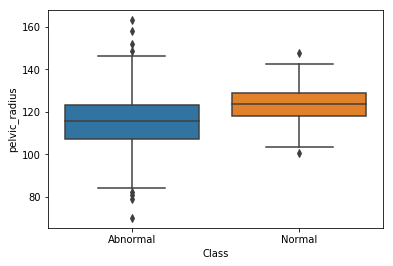

In [46]:
### Plotting the distribution of class for Pelvic radius attribute
sns.boxplot(x='Class',y='pelvic_radius',data=class_2)

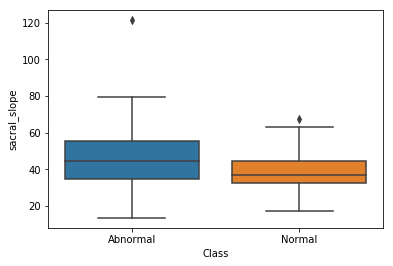

In [47]:
### Plotting the distribution of class for Sacral slope attribute
sns.boxplot(x='Class',y='sacral_slope',data=class_2)

# Encode the Class variable to integer.

In [49]:
## Encoding the categorical class variable into an integer and storing it in a new column
from sklearn.preprocessing import LabelEncoder
lb_class = LabelEncoder()
class_2["Class_int"] = lb_class.fit_transform(class_2["Class"])

In [50]:
class_2

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class,Class_int
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [122]:
## Create X Feature set with all the independent variables
X=class_2.drop(labels=['Class','Class_int'],axis=1)

In [55]:
##Creating Y target set with the target variable.
y=class_2[['Class_int']]

# Normalize your Data (X) to get values between 0 to 1.

In [56]:
## Normalizing the data by applying Z-scores so that all columns are having zero mean and one stanadard deviation
X=X.apply(zscore)

In [58]:
X.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


# Split the data as train and test with a ratio of 70:30.

In [59]:
test_size = 0.30 # taking 70:30 training and test set
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [64]:
X_train.shape

(217, 6)

In [65]:
X_test.shape

(93, 6)

In [66]:
y_train.shape

(217, 1)

In [67]:
y_test.shape

(93, 1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [60]:
## Defining KNN Model
KNN=KNeighborsClassifier()

In [61]:
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
# Call Nearest Neighbour algorithm and is being build on Train dataset
KNN.fit(X_train, y_train)

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
## Predicting test target variable by using KNN Model build on train dataset 
KNN.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0], dtype=int64)

In [76]:
y_test.T

,131,294,188,229,240,1,26,280,87,174,...,151,163,196,60,247,69,21,251,78,181
Class_int,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [153]:
## Predicting the accuracy of Train and Test Data.
print(("Train accuracy: ", KNN.score(X_train, y_train))) 
print(("Test accuracy: ", KNN.score(X_test, y_test)))

('Train accuracy: ', 0.8986175115207373)
('Test accuracy: ', 0.8602150537634409)


In [73]:
## Confusion matrix is displayed which shows the variations between actual and predicted values
metrics.confusion_matrix(y_test, KNN.predict(X_test))
## From the matrix there are 12 values found to be wrongly observed.

array([[59,  6],
       [ 6, 22]], dtype=int64)

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [77]:
X_train.shape[0]

217

In [78]:
maximum_k=int(np.sqrt(X_train.shape[0]))

In [84]:
optimalK = 1
optimalTrainAccuracy = 0
for k_i in range(maximum_k):
    if(((k_i % 2) != 0) & (k_i > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k_i)
        KNN.fit(X_train, y_train)
        if(KNN.score(X_train, y_train) > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = KNN.score(X_train, y_train)
print((optimalK, optimalTrainAccuracy))

## Optimal K Value is found to be 3

(3, 0.8986175115207373)


C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [90]:
## K-Neighbours algorithm is being build on with neighbors=3 and accuracy is tested on test data.
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

### Test Accuracy is found to be 86.02%

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8602150537634409

In [91]:
metrics.confusion_matrix(y_test, KNN.predict(X_test))
## With Optimal K value, the model is found to have 13 mispredicted values.

array([[58,  7],
       [ 6, 22]], dtype=int64)

# Import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [92]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Importing 3 class Data

In [93]:
## Importing class 3 data
class_3=pd.read_csv("3classdata.csv")

# Exploring the dataset

In [96]:
class_3.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [99]:
class_3.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [100]:
class_3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [98]:
class_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [101]:
## Class is converted to category from python object
class_3.rename(columns={'class':'Class3'},inplace=True)
class_3['Class3'] = class_3.Class3.astype('category')
class_3.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
Class3                      category
dtype: object

In [102]:
class_3.groupby(["Class3"]).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
Class3,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


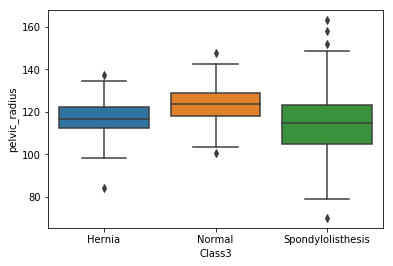

In [103]:
### Plotting pelvic radius for different classes
sns.boxplot(x='Class3',y='pelvic_radius',data=class_3)

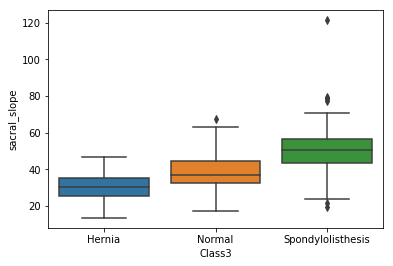

In [105]:
### Plotting sacral slope for different classes
sns.boxplot(x='Class3',y='sacral_slope',data=class_3)

# Encode the Class variable to integer.

In [106]:
### Encoding the class variables into an integer
from sklearn.preprocessing import LabelEncoder

lb_class3 = LabelEncoder()
class_3["Class3_int"] = lb_class3.fit_transform(class_3["Class3"])

In [112]:
class_3.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
Class3                      category
Class3_int                     int64
dtype: object

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [123]:
x=class_3.drop(labels=['Class3','Class3_int'],axis=1)
Y=class_3[['Class3_int']]

# Normalize your Data (X) to get values between 0 to 1.

In [124]:
### Applying Zscore to the dataset to have all values with mean 0 and StandarD deviation 1
x=x.apply(zscore)
x.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


# Split the data as train and test with a ratio of 70:30.

In [126]:
Test_size = 0.30 # taking 70:30 training and test set
Seed = 15
x_Train, x_Test, Y_Train, Y_Test = train_test_split(x, Y, test_size=Test_size, random_state=Seed)

In [127]:
x_Train.shape

(217, 6)

In [128]:
Y_Train.shape

(217, 1)

In [131]:
x_Test.shape

(93, 6)

In [132]:
Y_Test.shape

(93, 1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [139]:
### K-Neighbour model is build with K=5 and run on train data 
NNH=KNeighborsClassifier()
NNH.fit(x_Train,Y_Train)
NNH.predict(x_Test)

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 0, 2, 2], dtype=int64)

In [137]:
Y_Test.T

,80,52,254,170,264,2,261,99,38,211,...,58,287,86,75,124,11,292,49,162,92
Class3_int,2,0,1,2,1,0,1,2,0,1,...,0,1,2,2,2,0,1,0,2,2


# Calculate the performance score of of your classification on test dataset.

In [138]:
print(("Train accuracy: ", NNH.score(x_Train, Y_Train))) 
print(("Test accuracy: ", NNH.score(x_Test, Y_Test)))

('Train accuracy: ', 0.847926267281106)
('Test accuracy: ', 0.7526881720430108)


In [140]:
metrics.confusion_matrix(Y_Test, NNH.predict(x_Test))
## 23 values are being mispreted as per matrix

array([[10,  9,  1],
       [ 3, 18,  7],
       [ 0,  3, 42]], dtype=int64)

# What is the best K value for your classifcation?

In [141]:
maxk=int(np.sqrt(x_Train.shape[0]))

In [142]:
optimalk = 1
optimaltrainaccuracy = 0
for k_int in range(maxk):
    if(((k_int % 2) != 0) & (k_int > 1)):
        NNH = KNeighborsClassifier(n_neighbors=k_int)
        NNH.fit(x_Train, Y_Train)
        if(NNH.score(x_Train, Y_Train) > optimaltrainaccuracy):
            optimalk = k_int
            optimaltrainaccuracy = NNH.score(x_Train, Y_Train)
print((optimalk, optimaltrainaccuracy))
### The optimal K value is found to be 3 with accuracy of 90.33%

(3, 0.9032258064516129)


C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [152]:
### KNN model is being build with optimal k value of 3 and tested.
NNH= KNeighborsClassifier(n_neighbors=3)
NNH.fit(x_Train, Y_Train)
NNH.score(x_Test, Y_Test)

## The accuracy is found to be about 75.26%

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.7526881720430108

In [148]:
metrics.confusion_matrix(Y_Test, NNH.predict(x_Test))

## With optimal K value model is found to have 23 values wrongly interpreted

array([[10,  9,  1],
       [ 3, 18,  7],
       [ 0,  3, 42]], dtype=int64)